# Problem Statement

In [1]:
# import warnings

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding

In [4]:
# load data
lead_score = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead_score.shape

(9240, 37)

In [7]:
# concise summary of the DataFrame's structure
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# getting the descriptive statistics of all the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# list of all the column names
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# check if any duplicates in our DataFrame
lead_score.duplicated().sum()

0

# Data Pre-processing

### Data Cleaning

-  There are few categorical values that have 'select' as a level which indicates that a user might not have choosen any option from the dropdown menu and thus we can replace this with NaN.

In [11]:
# Handling the 'select' level present in few of the categorical variables
lead_score = lead_score.replace('Select' , np.nan)

In [12]:
# Checking for missing values
missing_value_percentage = round(lead_score.isnull().mean() * 100 ,2)

missing_value_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Filter the columns to drop those with missing values above 40%
columns_to_drop = missing_value_percentage[missing_value_percentage > 40].index

# view the columns to drop
columns_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
# dropping the columns having missing values > 40%
lead_score.drop(columns = columns_to_drop , inplace=True)

In [15]:
# check missing percentage again
round(lead_score.isnull().mean() *100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

-  There are still few columns with higher missing values, such as 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'; let us analysis them and understand the distribution of different values in these columns.

In [16]:
# Check the value counts for the 'Country' column
lead_score['Country'].value_counts(normalize = True) *100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

-  As we can see that majority of leads are from India, with 6492 entries and the counts for other countries are significantly lower, so we fill the missing values with 'India' and combine rest of the countries into a single category named "Others".

In [17]:
# Fill missing values in the 'Country' column with 'India'
lead_score['Country'].fillna('India', inplace=True)

In [18]:
# replace all countries except India with 'Others'
lead_score['Country'] = lead_score['Country'].apply(lambda x: 'India' if x == 'India' else 'Others')

In [19]:
# lets again check distribution
round(lead_score['Country'].value_counts(normalize = True) *100, 2)

Country
India     96.89
Others     3.11
Name: proportion, dtype: float64

-  Majority of leads or potential leads i.e. approximately 96.89%, are from India. The remaining countries contribute to only about 3.11%. This highly imbalanced distribution may not provide significant predictive value for our model thus we drop it.

In [20]:
# Drop the 'Country' column
lead_score.drop(columns=['Country'], inplace=True)

In [21]:
# Replace missing values in the 'Specialization' column with 'Not Provided'
lead_score['Specialization'].fillna('Not Provided', inplace=True)

In [22]:
lead_score['Specialization'].value_counts(normalize = True) *100

Specialization
Not Provided                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

-  Due to the large number of specialization fields and the presence of low data counts in many categories, it's beneficial to combine similar domains to improve data representation also this reduces the number of unique labels that will help during the creation of dummy variables.

In [23]:
# combining similar specialization
lead_score['Specialization'] = lead_score['Specialization'].replace(['Finance Management', 'Banking, Investment And Insurance', 'E-COMMERCE'], 'Finance and Banking')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Marketing Management', 'Retail Management', 'Media and Advertising'], 'Marketing and Sales')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Business Administration','International Business','E-Business','Rural and Agribusiness','IT Projects Management'], 'Business Administration and IT')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Operations Management','Supply Chain Management','Travel and Tourism','Services Excellence','Healthcare Management','Human Resource Management','Hospitality Management'], 'Operations and Others')

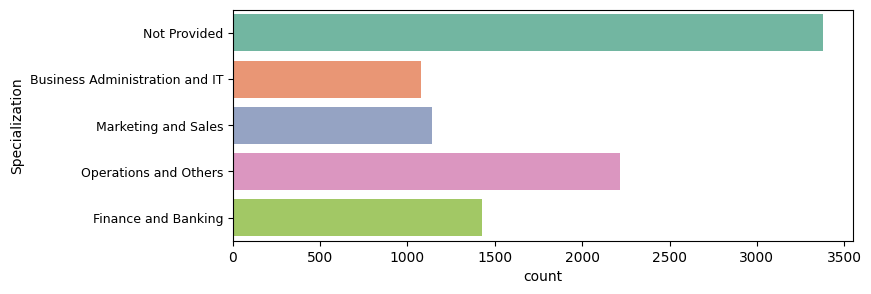

In [24]:
#lets visualize how skewed the data is
plt.figure(figsize= [8,3])
sns.countplot(lead_score['Specialization'], palette ="Set2")
plt.yticks(fontsize = 9)
plt.show()

-  A significant portion of the data indicates missing information, since 'Specialization' is a categorical column we can impute missing data with the most frequent i.e. the mode, in this case 'Operations and Others', however, imputing with the mode may result in that category becoming overly dominant, which can skew the data and affect the performance of the model. 
-  Later, when we create dummy variables for categorical data, we can choose to drop the 'Not Provided' category to prevent it from disproportionately influencing the model.

In [25]:
# Replace missing values in the 'What is your current occupation' column with 'Not Provided'
lead_score['What is your current occupation'].fillna('Not Provided', inplace=True)

In [26]:
# Check the value counts for the 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [27]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Businessman'], 'Working Professional')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Housewife','Other'], 'Others')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Not Provided'], 'Unemployed')

In [28]:
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              89.718615
Working Professional     7.727273
Student                  2.272727
Others                   0.281385
Name: proportion, dtype: float64

In [29]:
# Replace missing values in the 'What matters most to you in choosing a course' column with 'Not Provided'
lead_score['What matters most to you in choosing a course'].fillna('Not Provided', inplace=True)

In [30]:
# Check the value counts for the 'What matters most to you in choosing a course' column
lead_score['What matters most to you in choosing a course'].value_counts(normalize = True) *100

What matters most to you in choosing a course
Better Career Prospects      70.649351
Not Provided                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

-  the 'What matters most to you in choosing a course' column is highly imbalanced, with the vast majority of entries falling under 'Better Career Prospects.' In cases like this, the imbalance can result in the feature providing little to no meaningful contribution to a predictive model.

In [31]:
# Drop the 'What matters most to you in choosing a course' column
lead_score.drop(columns=['What matters most to you in choosing a course'], inplace=True)

In [32]:
# Replace missing values in the 'Tags' column with 'Not Provided'
lead_score['Tags'].fillna('Not Provided', inplace=True)

In [33]:
# Check the value counts for the 'Tags' column
lead_score['Tags'].value_counts(normalize = True) *100

Tags
Not Provided                                         36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

-  The 'Tags' column represents various statuses of leads, with a significant portion labeled as "Not Provided" (36.29%).
-  The 'Tags' column has many unique categories, some of which are redundant or overlap with others. For example, categories like 'Ringing', 'Busy', and 'switched off' all represent different stages of attempted contact, the tags may not provide useful predictive information and do not appear to add significant value for predictive modeling thus we drop it.

In [34]:
# Drop the 'Tags' column
lead_score.drop(columns=['Tags'], inplace=True)

In [35]:
# Replace missing values in the 'City' column with 'Not Specified'
lead_score['City'].fillna('Not Specified', inplace=True)

In [36]:
# Check the value counts for the 'City' column
lead_score['City'].value_counts(normalize = True) *100

City
Not Specified                  39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

-  To reduce the number of unique values and simplify the data representation, we will combine similar categories in the 'City' column.
-  The 'Not Specified' category, representing missing values, constitutes a significant portion of the data, imputing these missing values with the mode 'Mumbai' would create a substantial imbalance and could negatively impact the model's performance. Instead, we will keep 'Not Specified' as a separate category to avoid introducing bias and preserve the data's original distribution.

In [37]:
# merge similar labels
lead_score['City'] = lead_score['City'].replace({ 'Other Cities': 'Other Cities',
                                                 'Other Metro Cities': 'Other Cities',
                                                 'Tier II Cities': 'Other Cities',
                                                 'Thane & Outskirts': 'Other Cities of Maharashtra'
})

In [38]:
# Check the value counts after merging
print(lead_score['City'].value_counts(normalize=True) * 100)

City
Not Specified                  39.707792
Mumbai                         34.870130
Other Cities of Maharashtra    13.084416
Other Cities                   12.337662
Name: proportion, dtype: float64


-  The majority of leads are from Mumbai and or Not Specified, imputing or using this data might introduce noise,and also the other labels too don't seem to have some differentiating factor to help identify leads, thus dropping the 'City' column simplifies the dataset, reducing the number of features the model needs to consider.

In [39]:
# Drop the 'City' column
lead_score.drop(columns=['City'], inplace=True)

In [40]:
round(lead_score.isnull().mean() * 100 ,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

-  The columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit', and 'Last Activity' have small proportions of missing values which are less than 4-5% so to simplify the data preparation process and ensure the integrity of our dataset, we can safely drop the rows.

In [41]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

In [42]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

-  There are some columns in this dataset that have only one single value. 

In [43]:
# Check the unique value counts for the specified columns
print(lead_score['I agree to pay the amount through cheque'].value_counts())
print(lead_score['Update me on Supply Chain Content'].value_counts())
print(lead_score['Get updates on DM Content'].value_counts())
print(lead_score['Receive More Updates About Our Courses'].value_counts())

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64
Update me on Supply Chain Content
No    9074
Name: count, dtype: int64
Get updates on DM Content
No    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64


-  Columns with only one unique value like 'No', might not contribute meaningful information that could help in predicting the target variable.

In [44]:
# drop columns with a single unique value
col_to_drop = ['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses']
lead_score.drop(columns=col_to_drop, inplace=True)

In [45]:
lead_score.shape

(9074, 22)

In [46]:
lead_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [47]:
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration and IT,Student,No,No,No,No,No,No,No,Yes,Email Opened


### Handling Outliers

In [48]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


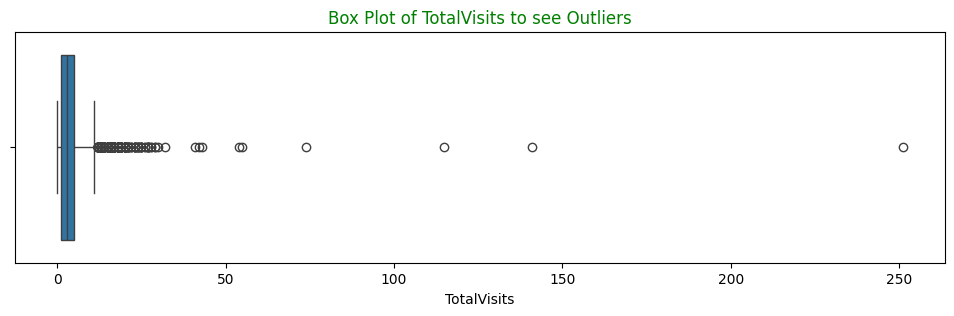

In [49]:
# checking outliers for TotalVisits 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score.TotalVisits)
plt.title('Box Plot of TotalVisits to see Outliers', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

-  In the TotalVisits column, which indicates the total number of visits made by the customer to the website, the maximum value is 251 which seems abnormally high and likely represents erroneous data.

In [50]:
# check the dataset for values of TotalVisits above 20
lead_score[lead_score['TotalVisits'] > 20]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
345,b852d04d-932a-4afd-8ab6-5be1b22ca1cf,656743,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,Operations and Others,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,Page Visited on Website,Operations and Others,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
663,f45f8039-d948-4004-9e1b-c56efbab9747,653687,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,Marketing and Sales,Unemployed,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,Page Visited on Website,Marketing and Sales,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,SMS Sent,Finance and Banking,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,Olark Chat Conversation,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2289,082ee6a1-e140-4d68-b88e-2a062e075e50,637608,Landing Page Submission,Google,No,No,1,21.0,1198,5.25,View in browser link Clicked,Operations and Others,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,Operations and Others,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website


-  From the above analysis it seems that few of the leads who visited the website more than 20 times have been converted but the rest seem outliers and they can skew the distribution, leading to biased estimates, and potentially mislead the model, so we drop them.

In [51]:
# Filter the DataFrame to include only rows where TotalVisits is less than or equal to 40
lead_score = lead_score[lead_score['TotalVisits'] <= 40]

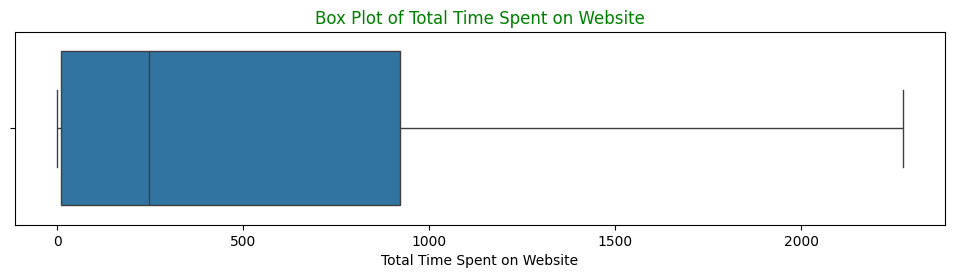

In [52]:
# checking outliers for Total Time Spent on Website 
plt.figure(figsize=[12,2.5])
sns.boxplot(x = lead_score['Total Time Spent on Website'])
plt.title('Box Plot of Total Time Spent on Website', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

- Since there are no outliers for 'Total Time Spent on Website', we dont need outlier treatment.

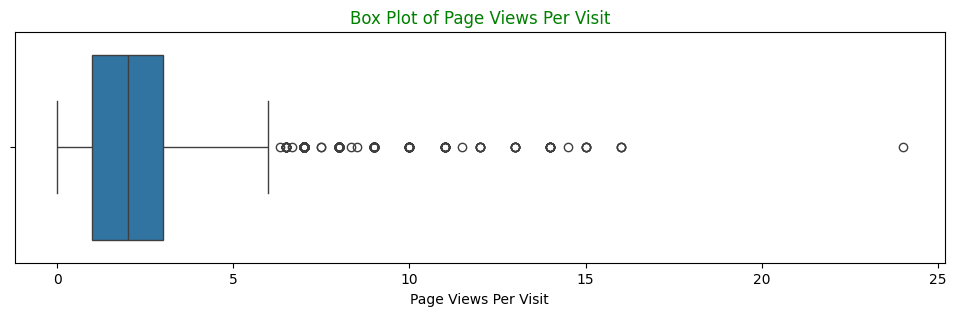

In [53]:
# checking outliers for Page Views Per Visit 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score['Page Views Per Visit'])
plt.title('Box Plot of Page Views Per Visit', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

In [54]:
lead_score['Page Views Per Visit'].quantile(0.99)

9.0

In [55]:
# check the dataset for values of Page Views Per Visit above 15
lead_score[lead_score['Page Views Per Visit'] > 15]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.0,Olark Chat Conversation,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified
5164,7b9369a0-b997-41f0-8a04-68677de0f1c8,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,Page Visited on Website,Finance and Banking,Unemployed,No,No,No,No,No,No,No,Yes,Modified
5495,48a5b72c-db78-48ab-bb15-8210754102ab,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,Page Visited on Website,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Yes,Modified
6805,57c557f0-f373-4468-affb-3ed5a03ea47c,597579,API,Organic Search,No,No,1,24.0,1527,24.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified


-  Above the 99th percentile there are many leads that have been converted, so removing those datapoints, might lead to unnecessary data loss, so we remove only the max datapoint to avoid inaccuracies.

In [56]:
# Filter the DataFrame to include only rows where Page Views Per Visit is less than or equal 16
lead_score = lead_score[lead_score['Page Views Per Visit'] <= 16]

In [57]:
# check size
lead_score.shape

(9064, 22)

In [58]:
# to get the number of unique values for each column
unique_values = pd.DataFrame({'Column Name': lead_score.columns, 'Unique Values': [lead_score[col].nunique() for col in lead_score.columns]})
unique_values = unique_values.sort_values(by='Unique Values')
print(unique_values)

                               Column Name  Unique Values
14                                Magazine              1
19                 Through Recommendations              2
18                   Digital Advertisement              2
4                             Do Not Email              2
5                              Do Not Call              2
6                                Converted              2
17                               Newspaper              2
16                      X Education Forums              2
15                       Newspaper Article              2
20  A free copy of Mastering The Interview              2
13                                  Search              2
2                              Lead Origin              4
12         What is your current occupation              4
11                          Specialization              5
21                   Last Notable Activity             16
10                           Last Activity             17
3             

In [59]:
# Check the unique value counts for the columns with less that 4 unique values except target variable 'Converted'
print(lead_score['Magazine'].value_counts())
print(lead_score['Through Recommendations'].value_counts())
print(lead_score['Do Not Email'].value_counts())
print(lead_score['Do Not Call'].value_counts())
print(lead_score['Digital Advertisement'].value_counts())
print(lead_score['X Education Forums'].value_counts())
print(lead_score['Newspaper Article'].value_counts())
print(lead_score['A free copy of Mastering The Interview'].value_counts())
print(lead_score['Search'].value_counts())

Magazine
No    9064
Name: count, dtype: int64
Through Recommendations
No     9057
Yes       7
Name: count, dtype: int64
Do Not Email
No     8354
Yes     710
Name: count, dtype: int64
Do Not Call
No     9062
Yes       2
Name: count, dtype: int64
Digital Advertisement
No     9060
Yes       4
Name: count, dtype: int64
X Education Forums
No     9063
Yes       1
Name: count, dtype: int64
Newspaper Article
No     9062
Yes       2
Name: count, dtype: int64
A free copy of Mastering The Interview
No     6179
Yes    2885
Name: count, dtype: int64
Search
No     9050
Yes      14
Name: count, dtype: int64


-  Column 'Magazine' has only one unique value and this does not contribute to the model's ability to make predictions, so we drop it and for the rest do EDA and decide.

In [60]:
# drop column 'Magazine'
lead_score.drop(columns = ['Magazine'], inplace =True)

In [61]:
lead_score.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,Email Opened


In [62]:
# analyse the remaining categorical columns
print(lead_score['Lead Origin'].value_counts())
print(lead_score['Lead Source'].value_counts())
print(lead_score['Last Activity'].value_counts())
print(lead_score['Last Notable Activity'].value_counts())

Lead Origin
Landing Page Submission    4876
API                        3577
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2536
Olark Chat           1753
Organic Search       1153
Reference             443
Welingak Website      129
Referral Sites        123
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Last Activity
Email Opened                    3431
SMS Sent                        2715
Olark Chat Conversation          972
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    312
Email Link Cli

-  'Lead Source' column indicates where the lead originated from, knowing the source of a lead can provide crucial insights into which channels are most effective at generating hot leads.
-  'Last Activity' column records the last interaction a lead had, understanding the last activity will help in planning the next step and can help predict the likelihood of conversion based on recent behavior.
-  'Last Notable Activity' column captures the last significant interaction, which might not always be the most recent activity, but since this column might be useful for training the mode, we will decide after checking for mmulticollinearity, whether to drop it.

In [63]:
# standardize similar labels
lead_score['Lead Source'] = lead_score['Lead Source'].replace({'google': 'Google'})

In [64]:
# replace the labels having less data entry points with 'others'
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['bing', 'Click2call', 'Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Other Sources')

In [65]:
# replace the labels having less data entry points with 'others'
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Other Activities')

In [66]:
# replace the labels having less data entry points with 'others'
lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'], 'Others')

In [67]:
lead_score.shape

(9064, 21)

# EDA

In [68]:
# check imbalance percentage
lead_score.Converted.value_counts(normalize  = True)  *100

Converted
0    62.12489
1    37.87511
Name: proportion, dtype: float64

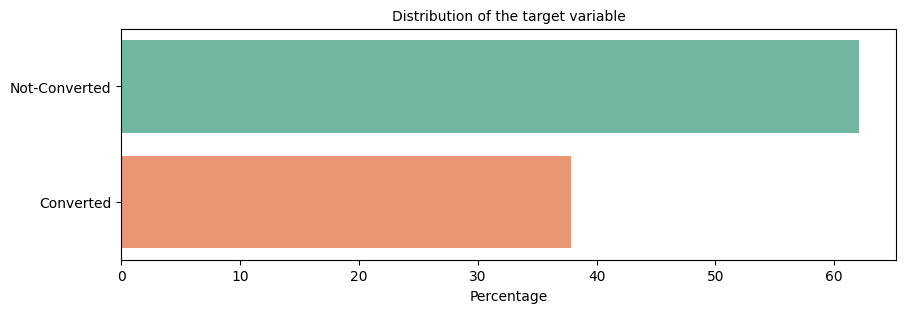

In [69]:
# Visualizing univariate characteristics of the Target variable
plt.figure(figsize= [10,3])
sns.barplot(y = ['Not-Converted','Converted'] ,  x = lead_score["Converted"].value_counts(normalize =True)*100, palette ="Set2")
plt.xlabel('Percentage')
plt.title("Distribution of the target variable", fontdict = {"fontsize":10})
plt.show()

### Univariate Analysis

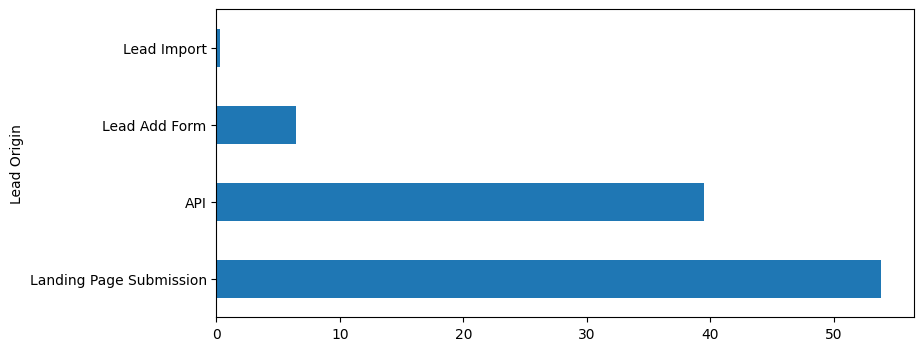

In [83]:
# percentage distribution of Lead Origin
plt.figure(figsize = (9,4))
(lead_score['Lead Origin'].value_counts(normalize = True)*100).plot.barh() 
plt.show()

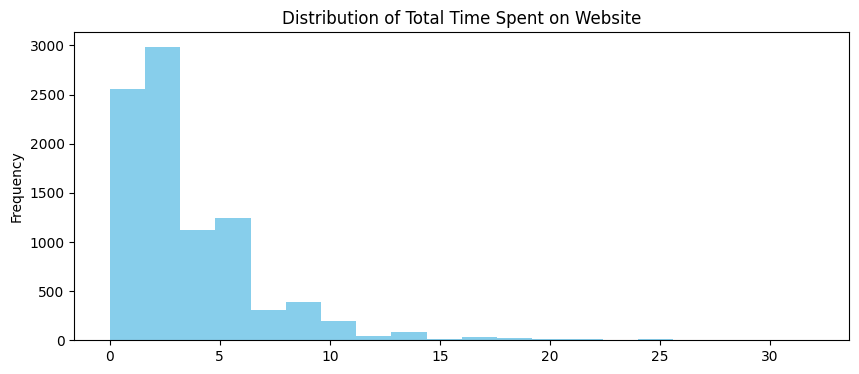

In [81]:
# to check distribution of TotalVisits
plt.figure(figsize = (10,4))
lead_score['TotalVisits'].plot(kind='hist',bins=20 , color = "skyblue")
plt.title('Distribution of TotalVisits')
plt.ylabel('Frequency')
plt.show()

### Segmented Univariate

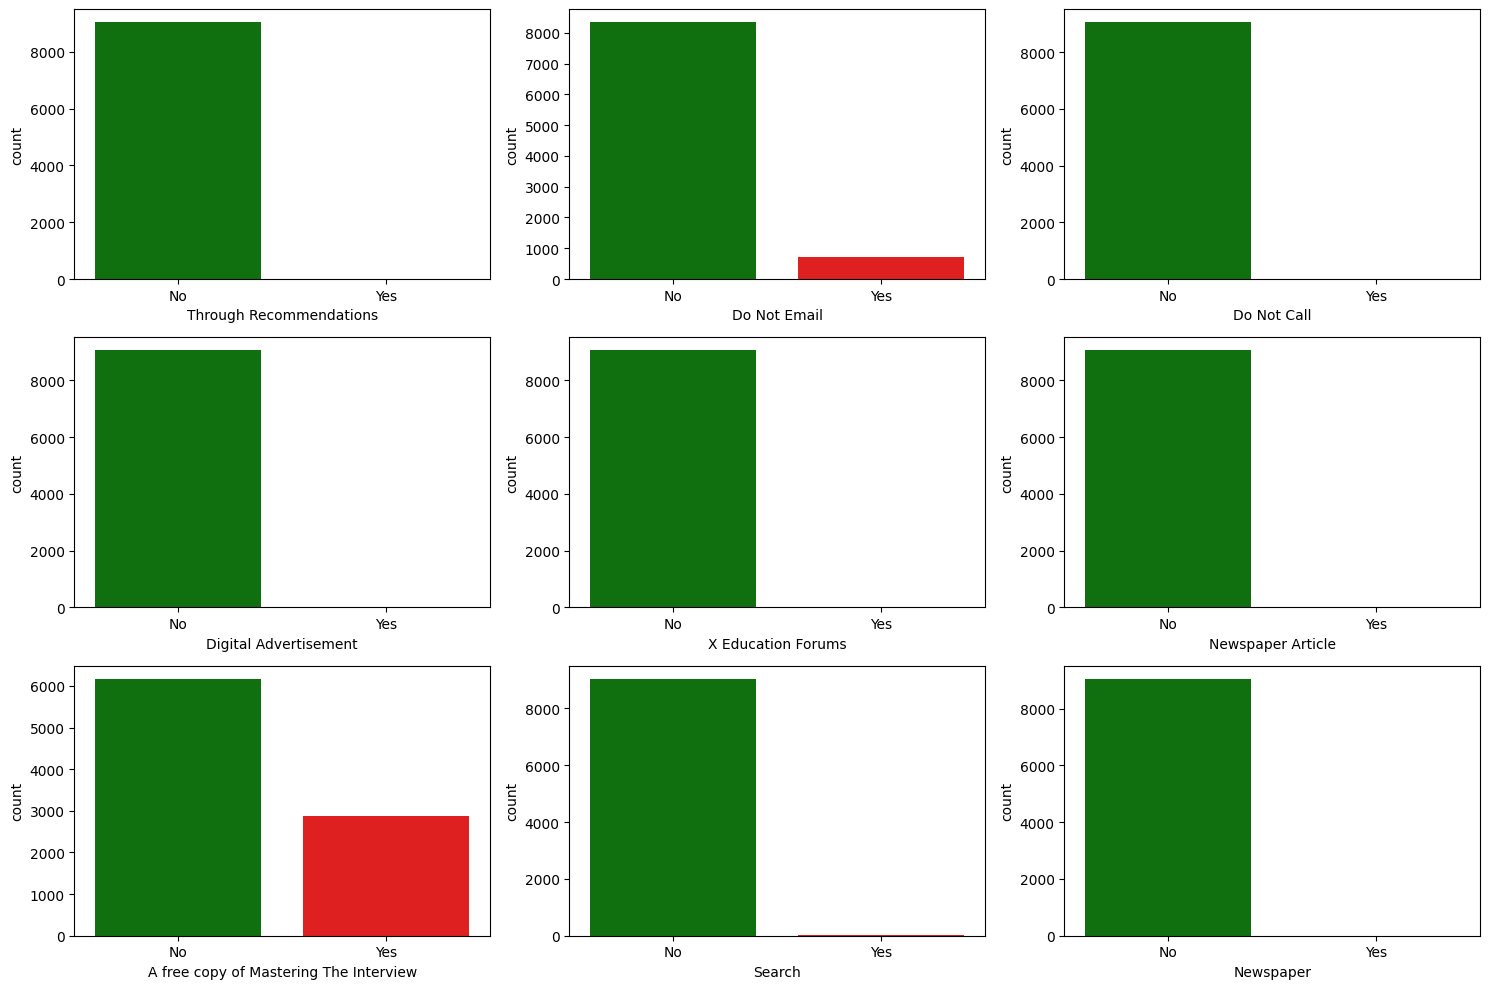

In [72]:
# Analyzing leads preferences and their response to advertisements
lead_preferences = ['Through Recommendations','Do Not Email','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','A free copy of Mastering The Interview','Search','Newspaper']
fig, axes = plt.subplots(nrows = 3 , ncols = 3, figsize=(15, 10))
axes = axes.flatten()     # Flatten the axes array for easy iteration

# Iterate over columns to plot counts
for i, col in enumerate(lead_preferences):
    sns.countplot(x=col,data=lead_score, ax=axes[i] ,palette=["g", "r"] )
    
plt.tight_layout()    #prevent overlapping to make everything fit nicely
plt.show()

-  It appears that the majority of customers did not acknowledge seeing the advertisement across all the channels listed in the columns. This is indicated by the dominance of the green bars No over the red bars Yes in each plot.
-  The significant imbalance between Yes and No responses in these columns could potentially affect the performance of a predictive model.
-  To simplify our model we drop these columns except variable 'A free copy of Mastering The Interview' and 'Do Not Email'

In [73]:
# drop columns 'Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Newspaper' and 'Search' 
lead_score.drop(columns = ['Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Search','Newspaper'], inplace =True)

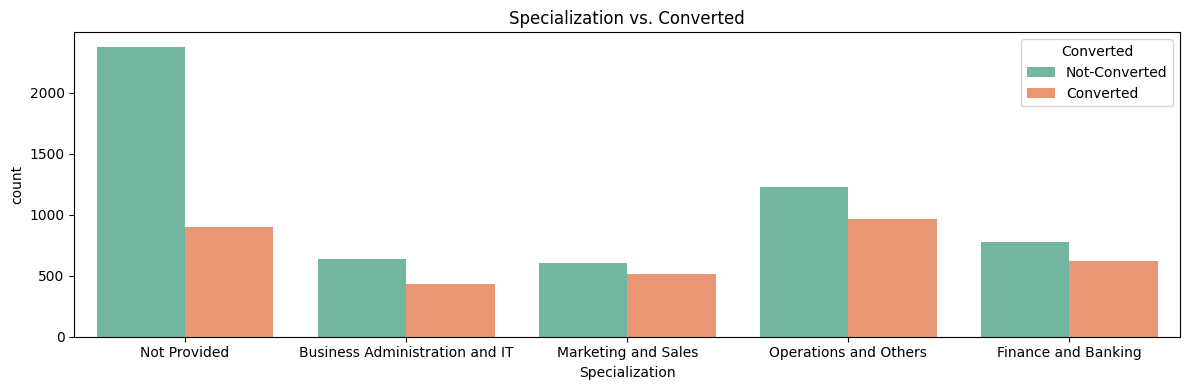

In [106]:
# Analyze how specialization categories influence conversion rates
plt.figure(figsize = [12,4])
sns.countplot(x='Specialization', hue='Converted', data=lead_score,  palette='Set2')
plt.title('Specialization vs. Converted')
plt.legend(title='Converted', labels=['Not-Converted', 'Converted'])
plt.tight_layout() 
plt.show()

### Bivariate Analysis

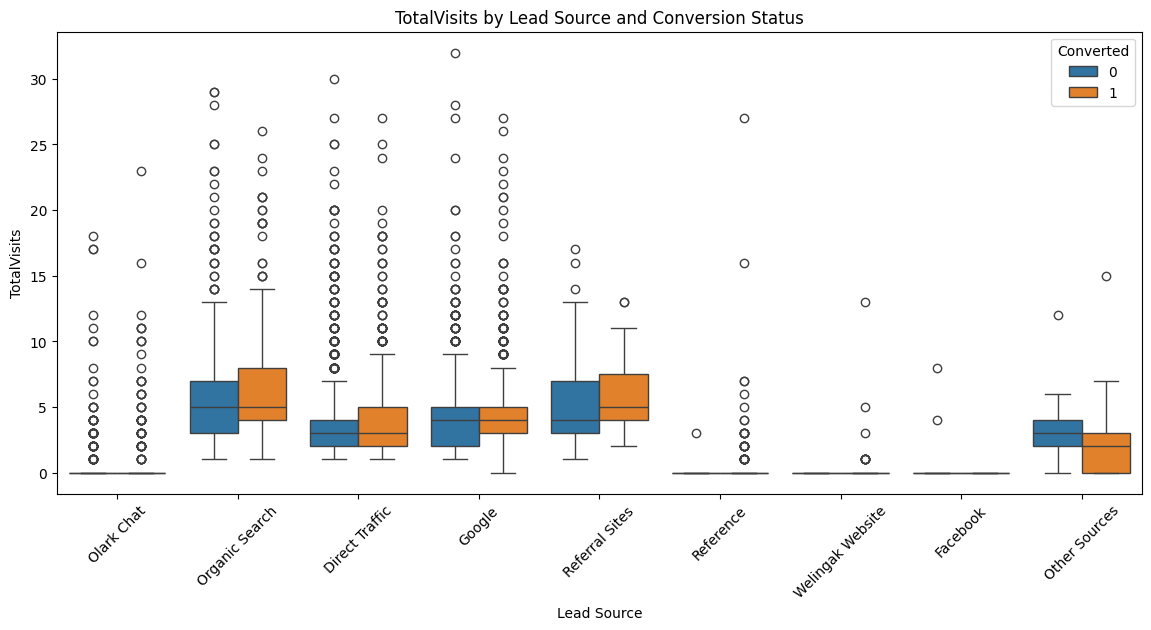

In [117]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Lead Source', y='TotalVisits', hue='Converted', data=lead_score)
plt.title('TotalVisits by Lead Source and Conversion Status')
plt.xticks(rotation=45)
plt.show()

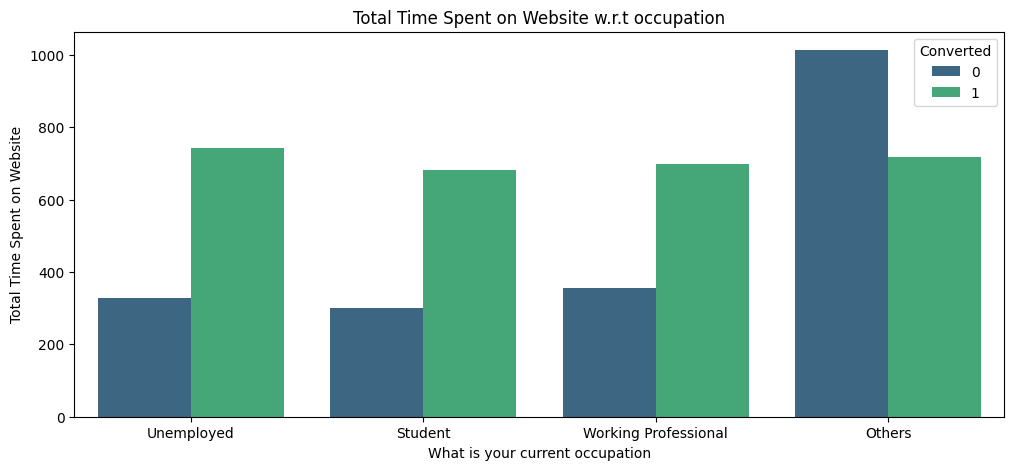

In [119]:
# the distribution of total time spent on the website across different occupations
plt.figure(figsize = [12,5])
sns.barplot(x='What is your current occupation', y='Total Time Spent on Website', hue='Converted', data=lead_score, palette='viridis', ci=None)
plt.title('Total Time Spent on Website w.r.t occupation')
plt.legend(title='Converted')
plt.show()

-  It seems that 'Unemployed' have a little bit higher conversion rate compared to other occupations, whereas 'Others' category have a low conversion rate even after spending the highest time on website compared to other occupations.

# plot for Lead Source vs TotalVisits
sns.scatterplot(x='Lead Source', y='TotalVisits', hue='Converted', data=lead_score)

# Relation between Total Time Spent on Website vs Page Views Per Visit
plt.figure(figsize = [3.5,5])
sns.jointplot(data=lead_score, x="Total Time Spent on Website", y="Page Views Per Visit", hue="Converted")
plt.show()

### Multivariate

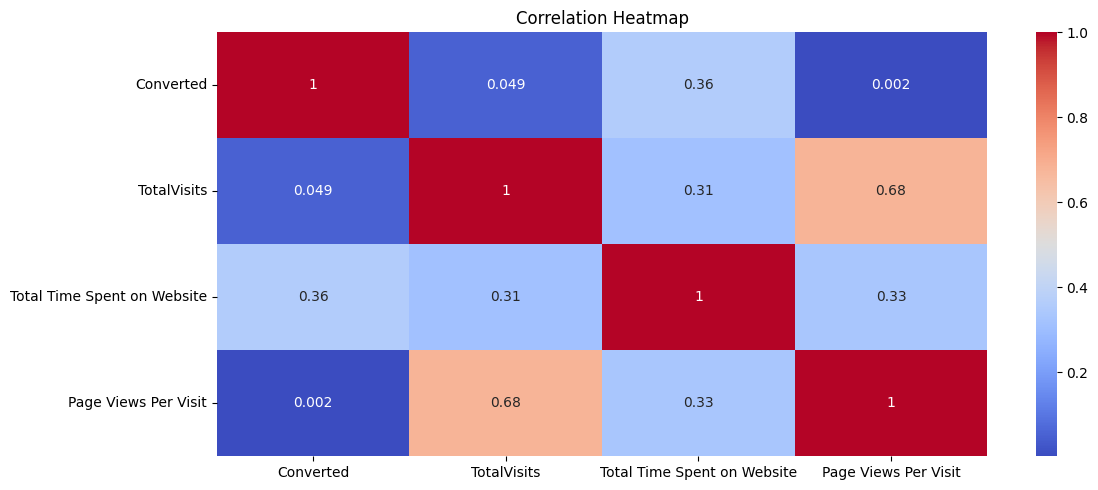

In [102]:
# correlation between few of the numerical variables w.r.t target variable
num_variables = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(12, 5))
sns.heatmap(lead_score[num_variables].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

-  There is a weak positive correlation between TotalVisits and conversion rate.
-  Total Time Spent on Website has a relatively moderate positive correlation (0.31) with Converted, might suggests that customers who spend more time on the website are more likely to convert.
-  Page Views Per Visit has a very weak positive correlation (0.002) with Converted

-------------

-  Machine learning algorithms require numerical input thus we will be converting 'Yes' and 'No' to 1 and 0, to make the data suitable for these algorithms.

In [ ]:
# list of columns to be converted
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# function to map Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# apply the function to the specified columns
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [ ]:
lead_score.head(3)

-  We have 6 categorical variables for which we have to create dummy variables, and in some of the variables we must drop the category specifying 'Not Provided', 'Others' etc. to make them as reference categories.

In [ ]:
# create dummy variables for 'Lead Origin'
m1 = pd.get_dummies(lead_score['Lead Origin'], prefix = 'Lead_Origin')

# dropping level with big names and to avoid multicollinearity issues and now this category becomes the reference category.
ml1 = m1.drop(['Lead_Origin_Landing Page Submission'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml1
lead_score = pd.concat([lead_score,ml1], axis = 1)

In [ ]:
# create dummy variables for 'Lead Source'
m2 = pd.get_dummies(lead_score['Lead Source'], prefix = 'Lead_Source')

# dropping level Other Sources and to avoid multicollinearity issues and now this category becomes the reference category.
ml2 = m2.drop(['Lead_Source_Other Sources'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml2
lead_score = pd.concat([lead_score,ml2], axis = 1)

In [ ]:
# create dummy variables for 'Last Activity'
m3 = pd.get_dummies(lead_score['Last Activity'], prefix = 'Last_Activity')

# dropping level Other Activities and to avoid multicollinearity issues and now this category becomes the reference category.
ml3 = m3.drop(['Last_Activity_Other Activities'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml3
lead_score = pd.concat([lead_score,ml3], axis = 1)

In [ ]:
# create dummy variables for 'Last Notable Activity'
m4 = pd.get_dummies(lead_score['Last Notable Activity'], prefix = 'Last_Notable_Activity')

# dropping level Others and to avoid multicollinearity issues and now this category becomes the reference category.
ml4 = m4.drop(['Last_Notable_Activity_Others'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml4
lead_score = pd.concat([lead_score,ml4], axis = 1)

In [ ]:
# create dummy variables for 'Specialization'
m5 = pd.get_dummies(lead_score['Specialization'], prefix = 'Specialization')

# dropping level with big names and to avoid multicollinearity issues and now this category becomes the reference category.
ml5 = m5.drop(['Specialization_Business Administration and IT'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml5
lead_score = pd.concat([lead_score,ml5], axis = 1)

In [ ]:
# before creating a dummy variable for 'What is your current occupation' column we need to rename the column since its lengthy
lead_score['Occupation'] = lead_score['What is your current occupation']

In [ ]:
# create dummy variables for 'Occupation'
m6 = pd.get_dummies(lead_score['Occupation'], prefix = 'Occupation')

# dropping level with big names and to avoid multicollinearity issues and now this category becomes the reference category.
ml6 = m6.drop(['Occupation_Working Professional'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml5
lead_score = pd.concat([lead_score,ml6], axis = 1)

In [ ]:
lead_score.drop(columns =['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','Occupation'], inplace=True)

In [ ]:
lead_score.shape

In [ ]:
lead_score.info(verbose = True)

In [ ]:
# 'Lead Number' is a unique identifier that doesn't have any mathematical significance so convert the 'Lead Number' column to object type.
lead_score['Lead Number'] = lead_score['Lead Number'].astype('object')

# Model Evaluation